In [1]:
# Standard 
import os, sys , copy ,shutil, logging, csv, json, logging
logger = logging.getLogger()
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from streamm import values

import dask
from dask import delayed
# Import all the streamm modules
from streamm import *

%load_ext autoreload
%autoreload 2

In [14]:
os.chdir('/Users/tkemper/Projects/DApolymers/notebooks')

In [2]:
local = resource.Resource('local')
local.load_json()

Reading in resource json file res_local.json 


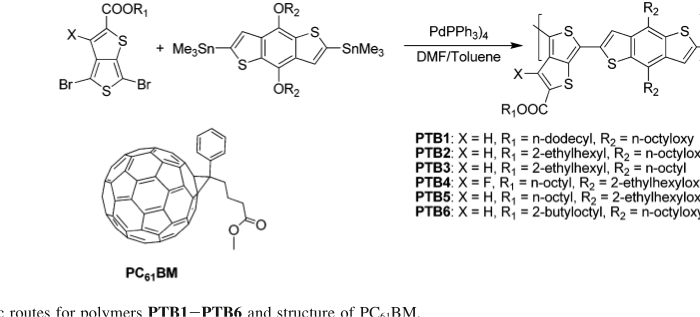

In [3]:
from IPython.display import Image
Image(filename=local.dir['home']+'/figures/PTBX.png')

In [4]:
name_l = []
name_l.append('BDT-TPD')
name_l.append('PTB1')
name_l.append('PTB5')
name_l.append('PTB4')
name_l.append('PTB7')
name_l.append('PCE10')

In [5]:
proj_tag = 'res_sp1'
proj_i = project.Project('DAPpolymers_%s'%(proj_tag))
proj_i.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [15]:
proj_j_tag = 'mol_sp2'
proj_j = project.Project('DAPpolymers_%s'%(proj_j_tag))
proj_j.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [7]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print 'proj_i.calculations[\''+tag_i+'\'].meta[\'use\'] = True '
    calc_i.meta['use'] = False 

proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min

In [8]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1'].meta['use'] = True 

In [41]:
for tag_j,calc_j in proj_j.calculations.iteritems():
    print 'proj_j.calculations[\''+tag_j+'\'].meta[\'use\'] = True '
    calc_j.meta['use'] = False 
    #print calc_j.properties['update']

proj_j.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_j.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_j.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_j.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_j.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_j.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2'].meta['use'] = True 




proj_j.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_j.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_j.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_j.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_j.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_j.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2'].meta['use'] = True 
proj_j.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_j.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR4

In [9]:
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o

    print  calc_i.tag  ,name_i

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1 BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1 PCE10


In [11]:
for tag,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    g_en = pd.read_csv(calc_i.files['output']['residue_en'])    
    g_info = pd.read_csv(calc_i.files['output']['group_residue'])    
    calc_i.g_en = pd.merge(g_en,g_info,on=['g_i'])

In [21]:
for key in calc_i.g_en.columns:
    print 'en_keys_i.append(\''+key+'\')'

en_keys_i.append('tag_x')
en_keys_i.append('g_i')
en_keys_i.append('total')
en_keys_i.append('HOMO')
en_keys_i.append('LUMO')
en_keys_i.append('tag_y')
en_keys_i.append('resname')
en_keys_i.append('mol')
en_keys_i.append('x_cent_mas')
en_keys_i.append('y_cent_mas')
en_keys_i.append('z_cent_mas')
en_keys_i.append('radius')


In [22]:
en_keys_i =[]
en_keys_i.append('total')
en_keys_i.append('HOMO')
en_keys_i.append('LUMO')

In [23]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print tag_i

    for key_i in  en_keys_i:
        print ' - ',key_i
        calc_i.g_en[key_i] = calc_i.g_en[key_i].apply(lambda x: units.convert_H_eV(x))


D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1
 -  total
 -  HOMO
 -  LUMO
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
 -  total
 -  HOMO
 -  LUMO
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
 -  total
 -  HOMO
 -  LUMO
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1

In [18]:
for tag_i,calc_j in proj_j.calculations.iteritems():
    os.chdir(calc_j.dir['launch'])
    calc_j.mol_en = pd.read_csv(calc_j.files['output']['mol_en'])    
   

In [20]:
    print calc_j.mol_en.columns

Index([u'tag', u'g_i', u'total', u'HOMO', u'LUMO'], dtype='object')


In [25]:
for key in calc_j.mol_en.columns:
    print 'en_keys_j.append(\''+key+'\')'

en_keys_j.append('tag')
en_keys_j.append('g_i')
en_keys_j.append('total')
en_keys_j.append('HOMO')
en_keys_j.append('LUMO')


In [26]:
en_keys_j =[]
en_keys_j.append('total')
en_keys_j.append('HOMO')
en_keys_j.append('LUMO')

In [27]:
for tag_j,calc_j in proj_j.calculations.iteritems():
    print tag_j

    for key_j in  en_keys_j:
        print ' - ',key_j
        calc_j.mol_en[key_j] = calc_j.mol_en[key_j].apply(lambda x: units.convert_H_eV(x))


D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2
 -  total
 -  HOMO
 -  LUMO
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2
 -  total
 -  HOMO
 -  LUMO
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2
 -  total
 -  HOMO
 -  LUMO
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2
 -  total
 -  HOMO
 -  LUMO
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193

In [36]:
    res_D = {}
    res_A = {}
    tag_i ='D1_R2R200_A2_R3_R200R200R201_n5_x197'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A2'
    tag_i ='D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A23'
    tag_i ='D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A23'
    tag_i ='D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A31'
    tag_i ='D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A31'
    tag_i ='D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173'
    res_D[tag_i] = 'D1'
    res_A[tag_i] = 'A23'

In [33]:
key_homo  = 'HOMO'
bin_homo = 0.05

In [31]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    calc_i.unit_homo = values.Values(key_i,calc_i.g_en[key_homo].values)    
    calc_i.unit_homo.calc_stats()
    calc_i.unit_homo.set_bins(bin_homo)
    calc_i.unit_homo.calc_hist()
    print tag_i
    print " - mean",calc_i.g_en[key_homo].mean(),calc_i.unit_homo.mean

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -8.46276338871 -8.46276338871
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.50965511974 -7.50965511974
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1
 - mean -7.50509630346 -7.50509630346
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.61743860302 -7.61743860302
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
 - mean -7.63453982893 -7.63453982893
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.47764663862 -7.47764663862
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.46411849236 -7.46411849236
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
 - mean -7.5096551

In [39]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    struc_tag = calc_i.properties['struc_tag']        
    g_res = calc_i.g_en[ calc_i.g_en['resname'] == res_D[struc_tag] ]
    calc_i.HOMO_D = values.Values(key_i,g_res[key_homo].values)    
    calc_i.HOMO_D.calc_stats()
    calc_i.HOMO_D.set_bins(bin_homo)
    calc_i.HOMO_D.calc_hist()
    print tag_i
    print " - mean",g_res[key_homo].mean(),calc_i.HOMO_D.mean

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.08044083902 -7.08044083902
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -6.84845936386 -6.84845936386
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1
 - mean -6.83934173131 -6.83934173131
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.08299573957 -7.08299573957
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
 - mean -7.10136623298 -7.10136623298
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.09661978271 -7.09661978271
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.07875590116 -7.07875590116
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
 - mean -6.8484593

In [40]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    struc_tag = calc_i.properties['struc_tag']        
    g_res = calc_i.g_en[ calc_i.g_en['resname'] == res_A[struc_tag] ]
    calc_i.HOMO_A = values.Values(key_i,g_res[key_homo].values)    
    calc_i.HOMO_A.calc_stats()
    calc_i.HOMO_A.set_bins(bin_homo)
    calc_i.HOMO_A.calc_hist()
    print tag_i
    print " - mean",g_res[key_homo].mean(),calc_i.HOMO_A.mean

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -9.8450859384 -9.8450859384
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -8.17085087562 -8.17085087562
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1
 - mean -8.17085087562 -8.17085087562
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -8.15015374169 -8.15015374169
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
 - mean -8.16771342489 -8.16771342489
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.85867349453 -7.85867349453
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1
 - mean -7.84948108356 -7.84948108356
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1
 - mean -8.170850875

In [35]:
for tag_j,calc_j in proj_j.calculations.iteritems():
    calc_j.mol_homo = values.Values(key_j,calc_j.mol_en[key_homo].values)    
    calc_j.mol_homo.calc_stats()
    calc_j.mol_homo.set_bins(bin_homo)
    calc_j.mol_homo.calc_hist()
    print tag_j
    print " - mean",calc_j.mol_en[key_homo].mean(),calc_j.mol_homo.mean

 D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2
 - mean -6.46748703609 -6.46748703609
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2
 - mean -6.32698110994 -6.32698110994
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2
 - mean -6.35930984023 -6.35930984023
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2
 - mean -6.46748703609 -6.46748703609
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2
 - mean -6.14770803853 -6.14770803853
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2
 - mean -6.32698110994 -6.32698110994
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2
 - mean -6.24119405628 -6.24119405628
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2
 

In [37]:
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print calc_i.properties['name']

BDT-TPD
PTB1
PTB5
PTB4
PTB7
PCE10


In [46]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')



 tag i  D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2
BDT-TPD
 tag j  D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2
 tag i  D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2
PTB1
 tag j  D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2
 tag i  D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2
PTB5
 tag j  D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2
 tag i  D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2
PTB4
 tag j  D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2
 tag i  D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2
PTB7
 tag j  D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2
 tag i  D1_R2R200_A23_R4_n1_R41n

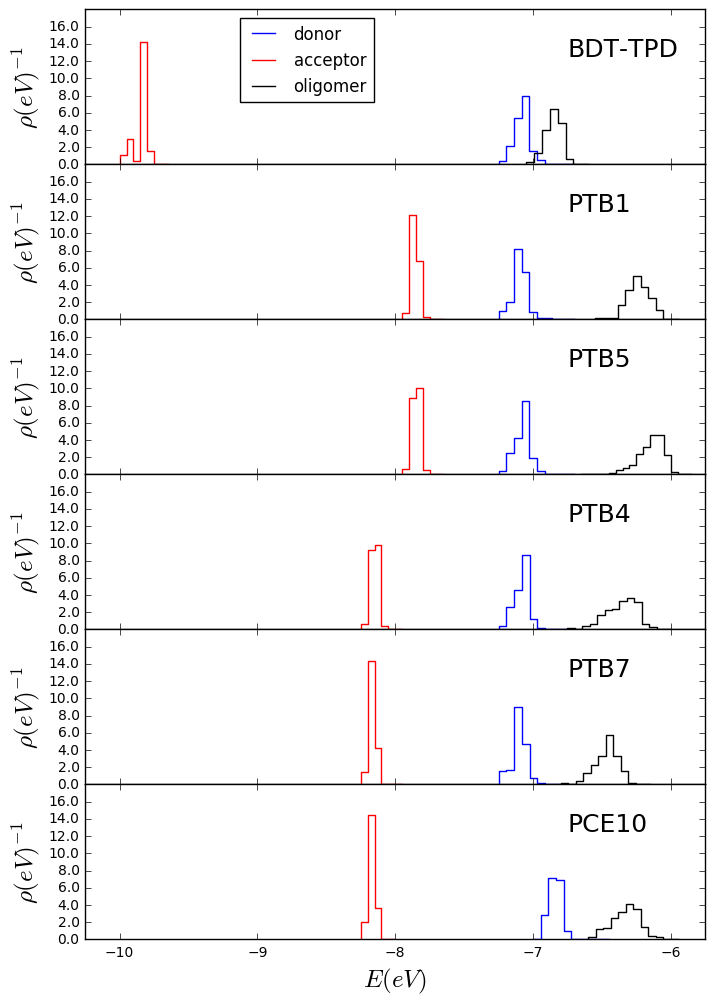

In [51]:
ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 12
fontsz_text = 18

fig, ax = plt.subplots(6,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o


    print  " tag i ",calc_j.tag  


    print calc_i.properties['name']
    val_i = calc_i.HOMO_D
    #fig, ax = plt.subplots(1)
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'b:',ls = "steps",ms=ms,label='donor')
    val_j = calc_i.HOMO_A
    ax[i].plot(val_j.bins_steps,val_j.hist_steps,'r-.',ls = "steps",ms=ms,label='acceptor')

    
    calc_j = None 
    for tag_i,calc_o in proj_j.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_j = calc_o

    print  " tag j ",calc_j.tag  
    #fig, ax = plt.subplots(1)
    val_i = calc_j.mol_homo
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps",ms=ms,label='oligomer')
    
    #ax[i].set_xlabel(r'$R^2$ ($\AA^2$)',fontsize=12)
    #ax[i].set_xlabel(r'$l^2$ ($\AA^2$)',fontsize=12)
    ax[i].set_xlabel(r'$E(eV) $',fontsize=fontsz_text)
    ax[i].set_ylabel(r'$\rho(eV)^{-1}$',fontsize=fontsz_text)
    ax[i].set_xlim(-10.25,-5.75)
    ax[i].set_ylim(0.0,18.0)
    #ax[i].text(55,0.015,name_i)
    #ax[i].set_xlim(0,1.0)
    #ax[i].set_ylim(0.0,10.0)
    ax[i].text(-6.75,12.50,name_i,fontsize=fontsz_text)

    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)    

    i+=1


ax[0].legend(loc=(0.25,0.40),prop={'size':fontsz_leg})
fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

    
#i += -1

In [52]:
fig_name = "%s_all_hist.pdf"%(key_i)
print fig_name
fig.savefig(fig_name,format='pdf')

HOMO_all_hist.pdf


In [53]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables')

In [55]:
table_lines = ' Polymer & $<E_{donor}>$  ($\sigma$)  & $<E_{acceptor}>$  ($\sigma$) & $<E_{oligomer}>$  ($\sigma$) \\\\ \hline \n'


for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o
    print  calc_i.tag  ,name_i
    table_lines += '%s '%(name_i) #calc_i.tag)
    table_lines += '& %8.2f (%8.2e) '%(calc_i.HOMO_D.mean,calc_i.HOMO_D.std)
    table_lines += '& %8.2f (%8.2e) '%(calc_i.HOMO_A.mean,calc_i.HOMO_A.std)
    
    

    calc_j = None 
    for tag_i,calc_o in proj_j.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_j = calc_o

    table_lines += '& %8.2f (%8.2e) '%(calc_j.mol_homo.mean,calc_j.mol_homo.std)

    
    table_lines += '\\\\ \n'

print table_lines    
f = open('HOMO.tex','w')
f.write(table_lines)
f.close()    
    

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_res_sp1 BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_sp1 PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_res_sp1 PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_res_sp1 PCE10
 Polymer & $<E_{donor}>$  ($\sigma$)  & $<E_{acceptor}>$  ($\sigma$) & $<E_{oligomer}>$  ($\sigma$) \\ \hline 
BDT-TPD &    -7.08 (5.57e-02) &    -9.85 (5.09e-02) &    -6.85 (5.61e-02) \\ 
PTB1 &    -7.10 (5.44e-02) &    -7.86 (2.40e-02) &    -6.24 (8.34e-02) \\ 
PTB5 &    -7.08 (5.49e-02) &    -7.85 (2.63e-02) &    -6.15 (9.98e-02) \\ 
PTB4 &    -7.08 (5.19e-02) &    -8.15 (2.52e-02) &    -6.36 (1.12e-01) \\ 
PTB7 &    -7.10 (5.24e-02) &